## 拉格朗日插值

In [2]:
#-*- coding:utf-8 -*-
import pandas as pd
from scipy.interpolate import lagrange
input_file='E://learnFile//chapter6//demo//data/missing_data.xls'
data=pd.read_excel(input_file)
data.head()

,235.8333,324.0343,478.3231
0,236.2708,325.6379,515.4564
1,238.0521,328.0897,517.0909
2,235.9063,NaN,514.8900
3,236.7604,268.8324,NaN
4,NaN,404.0480,486.0912


In [3]:
data=pd.read_excel(input_file,header=None)
data.head()

,0,1,2
0,235.8333,324.0343,478.3231
1,236.2708,325.6379,515.4564
2,238.0521,328.0897,517.0909
3,235.9063,NaN,514.8900
4,236.7604,268.8324,NaN


In [4]:
#自定义列向量插值函数
#S为列向量
#n为被插值的位置
#k为前后的数据个数，默认为5
def ployinterp_column(s,n,k=5):
    y=s[list(range(n-k))+list(range(n+1,n+1+k))]
    y=y[y.notnull()]#剔除空值
    return lagrange(y.index,list(y))(n)
for i in data.columns:
    for j in range(len(data)):
        if(data[i].isnull())[j]:
            data[i][j]=ployinterp_column(data[i],j)
data.head()

,0,1,2
0,235.8333,324.0343,478.323100
1,236.2708,325.6379,515.456400
2,238.0521,328.0897,517.090900
3,235.9063,-299.7635,514.890000
4,236.7604,268.8324,299.995333


## 数据划分

## 原始数据分为训练数据测试数据

In [6]:
import pandas as pd
from random import shuffle#导入随机函数
input_file='E://learnFile//chapter6//demo//data/model.xls'
data=pd.read_excel(input_file)#读取数据，前三列是特征，第四列是标签
data.head()

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0


In [7]:
data=data.as_matrix()#将表格转换为矩阵
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [2, 1, 1, 1],
       ..., 
       [5, 1, 2, 1],
       [2, 1, 0, 0],
       [4, 1, 0, 0]], dtype=int64)

In [8]:
shuffle(data)#随机打乱数据

In [9]:
p=0.8#设置训练数据的比例
train=data[:int(len(data)*p),:]
test=data[int(len(data)*p):,:]

## LM神经网络
使用Keras库为我们建立神经网络模型。 设定LM神经网络的输入节点数为3， 输出节点数为1， 隐层节点数为10， 使用Adam方法求解。 对于激活函数， 在隐藏层使用Relu（x） ＝
max（x， 0） 作为激活函数， 实验表明该激活函数能够大幅提高模型的准确率。 

## 构建LM神经网络模型代码

In [14]:
from keras.models import Sequential#导入神经网络的初始化函数
from keras.layers.core import Dense,Activation#导入神经网络的层函数，激活函数
netfile='./net.model'#构建神经网络模型存储路径

In [16]:
model=Sequential()#建立模型
model.add(Dense(input_dim=3,output_dim=10))
model.add(Activation('relu'))#用relu作为激活函数
model.add(Dense(input_dim=10,output_dim=1))
model.add(Activation('sigmoid'))#输出分类0或1

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(train[:,:3],train[:,3],nb_epoch = 1000, batch_size = 10) #训练模型，学习一千次yp=model.predict_classes(x).reshape(len(y))  #分类预测
model.save_weights(netfile)
predict_result=model.predict_classes(train[:,:3]).reshape(len(train))
yp = model.predict_classes(train[:,:3]).reshape(len(train)) #分类预测

C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=3, units=10)`
  from ipykernel import kernelapp as app
C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=1)`
C:\Users\pujing\Anaconda3\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
232/232 [==============================] - 0s - loss: 1.0504     
Epoch 2/1000
232/232 [==============================] - 0s - loss: 0.9352     
Epoch 3/1000
232/232 [==============================] - 0s - loss: 0.8564     
Epoch 4/1000
232/232 [==============================] - 0s - loss: 0.7911     
Epoch 5/1000
232/232 [==============================] - 0s - loss: 0.7465     
Epoch 6/1000
232/232 [==============================] - 0s - loss: 0.7073     
Epoch 7/1000
232/232 [==============================] - 0s - loss: 0.6808     

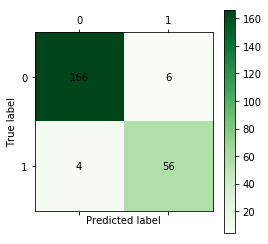

In [18]:
import matplotlib.pyplot as plt #导入作图库
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp) #混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    for x in range(len(cm)): #数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    return plt
cm_plot(train[:,3],yp).show() #显示混淆矩阵可视化结果

## 构建CART决策树模型代码

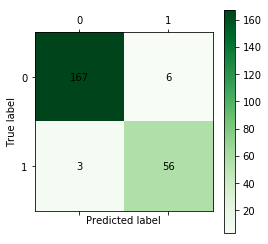

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(train[:,:3],train[:,3])
cm_plot(train[:,3],tree.predict(train[:,:3])).show()

## 绘制决策树的ROC曲线

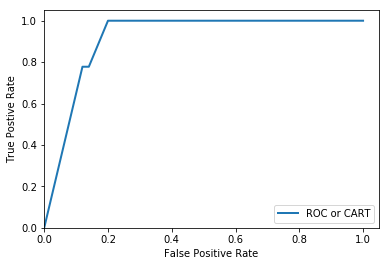

In [21]:
from sklearn.metrics import roc_curve 
fpr,tpr,thresholds=roc_curve(test[:,3],tree.predict_proba(test[:,:3])[:,1],pos_label=1)
plt.plot(fpr,tpr,linewidth=2,label='ROC or CART')
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()

## 绘制神经网络的ROC曲线

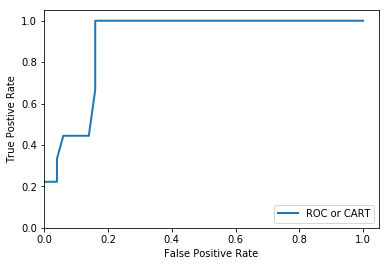

In [23]:
from sklearn.metrics import roc_curve 
predict_result=model.predict(test[:,:3]).reshape(len(test))
fpr,tpr,thresholds=roc_curve(test[:,3],predict_result)
plt.plot(fpr,tpr,linewidth=2,label='ROC or CART')
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()